# Analysis of SPH Kernels

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl


def gaussian_kernel(r, dim, h):
    @np.vectorize
    def get_kernel_value(r, dim, h):
        q = float(abs(r))/float(h)
        if abs(q) < 3:
            sigma_d = 1/((np.pi*h)**(dim))
            
            return sigma_d*(np.exp(-q*q))
        else:
            
            return 0.0
    return get_kernel_value(r, dim, h)


def variation_h(h):
    @np.vectorize
    def plot_h_effect(h):
        input_arr = np.linspace(-5,5,100)
        output_arr = gaussian_kernel(input_arr, 3, h)
        mpl.pyplot.plot(input_arr, output_arr)

    return (plot_h_effect(h),mpl.pyplot.legend(map(str,h)), mpl.pyplot.title("Gaussian kernel with varying h"))
 
def gaussian_kernel_derivative(r, dim, h):
    @np.vectorize
    def get_kernel_value(r, dim, h):
        q = float(abs(r))/float(h)
        if abs(q) < 3:
            sigma_d = 1/((np.pi*h)**(dim))
            
            return sigma_d*(np.exp(-q*q))*(2*q)*np.sign(r)
        else:
            
            return 0.0
    return get_kernel_value(r, dim, h)

def variation_h_gaussian_derivative(h):
    @np.vectorize
    def plot_h_effect(h):
        input_arr = np.linspace(-5,5,100)
        output_arr = gaussian_kernel_derivative(input_arr, 3, h)
        mpl.pyplot.plot(input_arr, output_arr)
    return (plot_h_effect(h),mpl.pyplot.legend(map(str,h)), mpl.pyplot.title("Gaussian Derivative with varying h"))

def approx_fx(f, x, kernel, dim, h, xj):
    '''
    Approximate value of f at x given xj points and their corresponding f(xj)
    '''
    r = np.ones(xj.shape[0])*x - xj
    res = np.sum(kernel(r, dim, h)*f(xj))
    return res

def analyse(new_domain, f0, train_domain, dim, h, kernel, plot):


    res = []
    for i in new_domain:

        res.append(approx_fx(f0, i, kernel, dim, h, train_domain))
    
    if plot == True:
        mpl.pyplot.plot(new_domain, res)
        mpl.pyplot.plot(new_domain, f0(new_domain))
        mpl.pyplot.legend(['Approximate', 'Exact'])
        mpl.pyplot.title(str(f0))

    sqerrror = np.sum((np.array(res) - f0(new_domain))**2)
    
    return sqerrror**0.5

def find_optimum_h(h_range, new_domain, f0, train_domain, dim, kernel):

    error = []
    for h in h_range:
        error.append(analyse(new_domain, f0, train_domain, dim, h, kernel, False))
    mpl.pyplot.plot(h_range, error)   
    return "Optimum h : ",list(h_range)[error.index(min(error))]

(array([None, None, None, None, None, None, None, None, None], dtype=object),
 Text(0.5,1,'Gaussian Derivative with varying h'))

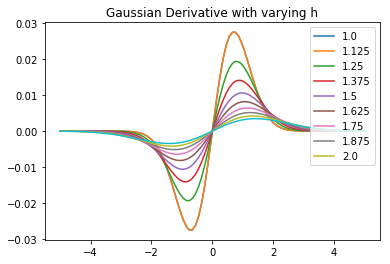

In [2]:
variation_h_gaussian_derivative(np.linspace(1,2,9))

(array([None, None, None, None, None, None, None, None, None], dtype=object),
 Text(0.5,1,'Gaussian kernel with varying h'))

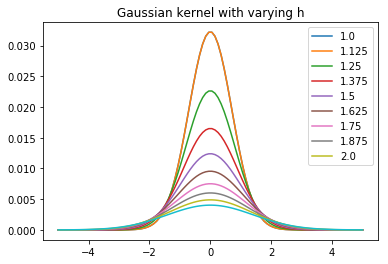

In [3]:
variation_h(np.linspace(1,2,9))

('Optimum h : ', 2.8000000000000003)

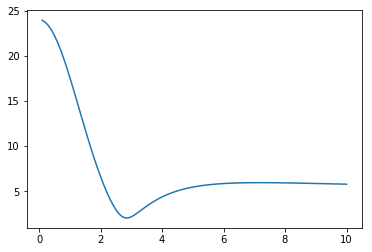

In [4]:
find_optimum_h(np.linspace(0.1,10,100), np.linspace(1,8,50), np.sin, np.linspace(0,10,100), 1, gaussian_kernel)

2.168826355816848

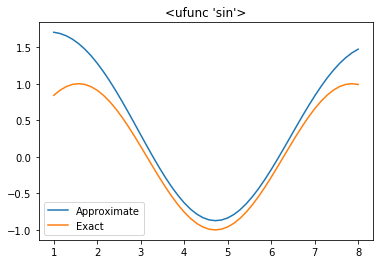

In [5]:
analyse(np.linspace(1,8,50), np.sin, np.linspace(0,10,100), 1, 2.7, gaussian_kernel, True)

41.296259148445586

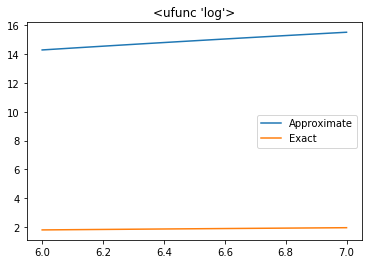

In [6]:
analyse(np.linspace(6,7,10), np.log, np.linspace(3,10,100), 1, 0.1, gaussian_kernel, True)

('Optimum h : ', 0.1)

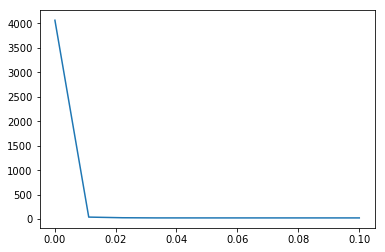

In [7]:
find_optimum_h(np.linspace(0.0001,0.1,10), np.linspace(6,7,100), np.sin, np.linspace(3,10,100), 1, gaussian_kernel)